# MASTERS IN APPLIED COMPUTER SCIENCE 
## TECHNIQUES OF ARTIFICIAL INTELLIGENCE 
### LECTURER:GERAINT WIGGINS.                 
### TEACHING ASSISTANT:ISEL DEL CARMEN GRAU GARCIA
#### ABHISHEIK KRISHNAGIRI TUPIL RAVIKANTH - 0575002

### Goal of the Project.

#### We are implementing two algorithms Support Vector Machine(SVM) and Decision Tree(ID3) on two datasets Breast Cancer Coimbra Dataset(BCCD) and Wisconsin Breast Cancer Dataset(WBCD) and compare them based on the performance and conclude which algorithm is better for each of the dataset. This is a classification based problem , where we are classifying if a person is healthy or not in the first dataset(BCCD) and if the person has benign or malignant tumour in the second dataset(WBCD).

### Algorithms Choosen.

#### SUPPORT VECTOR MACHINE ALGORITHM.(SVM)
#### SVM (Support Vector Machine) is a supervised machine learning algorithm that can be used to solve classification and regression problems. It is, however, mostly used to solve classification problems. Each data object is plotted as a point in n-dimensional space (where n is the number of features you have), with the value of each function being the value of a certain coordinate in the SVM algorithm.Then we conduct classification by locating the hyper-plane that clearly distinguishes the two types.

#### DECISION TREE ALGORITHM. (ID3)
#### A decision tree is a type of machine learning algorithm that divides data into groups. Partitioning begins with a binary split and proceeds until no further splits are possible. Various branches of varying lengths develop.A decision tree's aim is to condense the training data into the shortest possible tree.

### Importing the necesssary libraries.

#### 1) The pandas library is used for data manipulation purposes.
#### 2) The matplotlib and the seaborn libraries are used for visualisation purposes. They can be used in order to plot different graphs and plots.

In [1]:
# Importing the necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the necessary libraries which help in the working of the Machine Learning Models.
#### 1) From the sklearn or the scikitlearn library we import the Support Vector Machine(SVM) and the Decision Tree(ID3) algorithm packages.
#### 2) For preprocessing , in our case for scaling purposes we also import the preprocessing package from scikit learn.
#### 3) For Cross validation purposes we are importing the model_selection package from scikit learn.

In [2]:
# Importing the necessary Machine learning imports
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading the Dataset.
#### There are two dataset which we will be using in our project.
#### 1) BCCD: Breast Cancer Coimbra Dataset.
#### The BCCD data is made up of 116 instances, each with ten attributes. Age, BMI, glucose, insulin, HOMA, leptin, adiponectin, resist in, and MCP.1 are the independent characteristics, which are based on human body size and shape and are the basis upon which all digital human models are constructed.The dependent attribute is classification, which is represented as an integer between 1 and 2, with 1 representing healthy controls and 2 representing patients.
The link for the dataset : https://archive.ics.uci.edu/ml/machine-learning-databases/00451/
#### 2) WBCD: Breast Cancer Wisconsin Dataset.
#### There are 699 instances are represented in the WBCD info. Each case in this dataset has a sample code and ten attributes. Clump Thickness, Cell Size Uniformity, Cell Shape Uniformity, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Bland Chromatin, Normal Nucleoli, and Mitoses are the independent characteristics,an integer in the range of 1 to 10 is used to describe each of them. The dependent characteristic is class, which is represented by the integers 2 and 4, with 2 indicating benign and 4 indicating malignant.
The link for the dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/


In [3]:
# Reading the BCCD dataset
bccd = pd.read_csv('/Users/abisheikktr/Documents/VUB/Sem 2/AI/Project/dataR2.csv')
# Reading the WBCD dataset and naming the columns.
wbcd = pd.read_csv("/Users/abisheikktr/Documents/VUB/Sem 2/AI/Project/breast-cancer-wisconsin.data",delimiter=',',names=["id number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"])

## Coimbra Breast Cancer Dataset

In [4]:
# Printing the first few values of the dataset to check.
bccd.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [5]:
# Printing the dimension of the dataset (BCCD)
print("Dimension of the Coimbra Breast Cancer Data set : {}".format(bccd.shape))

Dimension of the Coimbra Breast Cancer Data set : (116, 10)


#### Before proceeding with the model selection and training process, we have to analyze the dataset and find if there is any noise/missing value present in it. So we can rectify it and the proceed with the cleaned data.
#### One of the method to finalize with the feature selection is to find the correlation between the features in the given dataset.

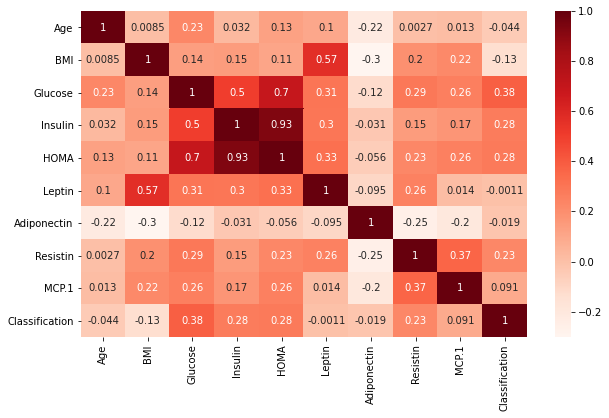

In [6]:
# Plotting the correlation between the features
plt.figure(figsize=(10,6))
correlation1 = bccd.corr()
sns.heatmap(correlation1,annot=True,cmap = plt.cm.Reds)
plt.show()

#### By finding out the data type of each of the features in the provided dataset,we will have some idea on how to proceed with the scaling of the data.

In [7]:
bccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


## Performing the Train-Test split. 
### The train-test split of the data is performed to for evaluation process.For that we are using the train_test_split function from the scikit_learn library which we have already imported.

In [21]:
bccd.Classification.value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [13]:
# Classification column in our case is the label , so we do not consider it in the training dataset, so we drop it.
X = bccd.iloc[:,0:9]
# Classification column is the label which is used as a target variable.
Y = bccd.iloc[:,9]
# Assigning of the variables of the train test split which is performed on the training data set.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
# Scaling of the data by using the Standard Scaler.
standard_scaler = StandardScaler()
# Performing Scaling on the training set.
X_train = standard_scaler.fit_transform(X_train)
# Performing Scaling on the test set.
X_test = standard_scaler.transform(X_test)

## Model selection and execution for the Coimbra Breast Cancer Dataset.

### 1) SUPPORT VECTOR MACHINE(SVM)
#### a. Without Cross Validation

In [14]:
# Assiging the classifier to a variable
svm = SVC(kernel='linear',random_state=0)
# Training the model.
svm.fit(X_train,Y_train)
# Predicting the model.
svm_pred = svm.predict(X_test)
# Printing the confusion matrix for the predictions.
confusionmatrix = confusion_matrix(Y_test,svm_pred)
# Printing the Results
print('The confusion matrix of the SVM model without cross validation:')
print(confusionmatrix)
print('\nThe classification report of the SVM model without cross validation:')
print(classification_report(Y_test,svm_pred))
print('\nThe accuracy of the SVM model without cross validation:')
print(accuracy_score(Y_test,svm_pred)*100)

The confusion matrix of the SVM model without cross validation:
[[5 6]
 [5 8]]

The classification report of the SVM model without cross validation:
              precision    recall  f1-score   support

           1       0.50      0.45      0.48        11
           2       0.57      0.62      0.59        13

    accuracy                           0.54        24
   macro avg       0.54      0.53      0.53        24
weighted avg       0.54      0.54      0.54        24


The accuracy of the SVM model without cross validation:
54.166666666666664


#### b. With Cross Validation

In [15]:
# Defining the classifier 
svm_cv = SVC(kernel='linear',random_state=0)
# Running the 5-cross validation.
svm_cv_pred = cross_val_score(svm_cv,X_train,Y_train,cv=5)
# Printing the Results.
print('The Accuracy Score after 5-Cross Validation are as follows')
print(svm_cv_pred)
print('\n The Best Score :',max(svm_cv_pred)*100)

The Accuracy Score after 5-Cross Validation are as follows
[0.63157895 0.57894737 0.61111111 0.88888889 0.72222222]

 The Best Score : 88.88888888888889


### 2. Decision Tree Algorithm (ID3)
#### a. Without Cross Validation

In [16]:
# Defining the classifier 
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
# Training the Model
dt.fit(X_train,Y_train)
# Predicting the model
dt_predict = dt.predict(X_test)
# Creating the confusion matrix for our predictions
confusematrix = confusion_matrix(Y_test,dt_predict)
print('The confusion matrix of the ID3 model without cross validation:')
print(confusematrix)
print('\nThe classification report of the ID3 model without cross validation:')
print(classification_report(Y_test,dt_predict))
print('\nThe accuracy of the ID3 model without cross validation:')
print(accuracy_score(Y_test,dt_predict)*100)

The confusion matrix of the ID3 model without cross validation:
[[7 4]
 [4 9]]

The classification report of the ID3 model without cross validation:
              precision    recall  f1-score   support

           1       0.64      0.64      0.64        11
           2       0.69      0.69      0.69        13

    accuracy                           0.67        24
   macro avg       0.66      0.66      0.66        24
weighted avg       0.67      0.67      0.67        24


The accuracy of the ID3 model without cross validation:
66.66666666666666


#### b) With Cross Validation.

In [17]:
# Defining the classifier 
dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
# Predicting the model with cross validation.
dt_cv_pred = cross_val_score(dtc,X_train,Y_train,cv=5)
# Printing the Values
print('The Accuracy Score after 5-Cross Validation are as follows')
print(dt_cv_pred)
print('\nThe best accuracy of the ID3 model with cross validation:')
print(max(dt_cv_pred)*100)

The Accuracy Score after 5-Cross Validation are as follows
[0.68421053 0.63157895 0.55555556 0.83333333 0.66666667]

The best accuracy of the ID3 model with cross validation:
83.33333333333334


## Comparing the Algorithms on the Coimbra Breast Cancer Data Set.

### Accuracy of the Model.

<BarContainer object of 1 artists>

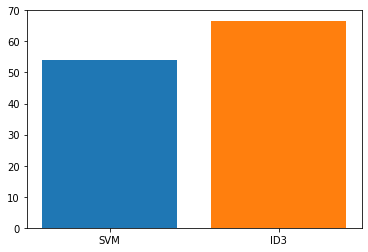

In [62]:
svm_score = (accuracy_score(Y_test,svm_pred)*100)
dt_score = (accuracy_score(Y_test,dt_predict)*100)
plt.bar(['SVM'],svm_score)
plt.bar(['ID3'],dt_score)

### AUC Metric of the Model.


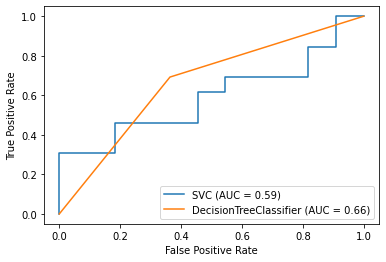

In [63]:
models = [svm, dt]
ax = plt.gca()
for i in models:
    plot_roc_curve(i, X_test, Y_test, ax=ax)

### F1-Score of the Model.

<BarContainer object of 1 artists>

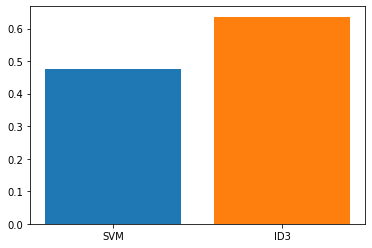

In [64]:
f1_svm = f1_score(Y_test,svm_pred)
f1_dt = f1_score(Y_test,dt_predict)
plt.bar("SVM",f1_svm)
plt.bar("ID3",f1_dt)

### From the grpahs plotted above , we can come to a conclusion that the Decision Tree Algorithm has a better performance over the Support Vector Machine Algorithm based on the following parameters.
### 1. Accuracy Measure : ID3 has 66.66666666666666 %
### 2. AUC Metric : ID3 has 0.66
### 3. F-1 Score : ID3 has 0.6363636363636364

## Wisconsin Breast Cancer Dataset.

In [44]:
# Checking the dataset
wbcd.head()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [45]:
# Printing the dimension of the dataset (WBCD)
print("Dimension of the Wisconsin Breast Cancer Data set : {}".format(wbcd.shape))

Dimension of the Wisconsin Breast Cancer Data set : (699, 11)


In [46]:
wbcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id number                    699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [47]:
wbcd.replace('?',0,regex=False,inplace=True)
wbcd["Bare Nuclei"] = pd.to_numeric(wbcd["Bare Nuclei"],errors='coerce')
wbcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id number                    699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


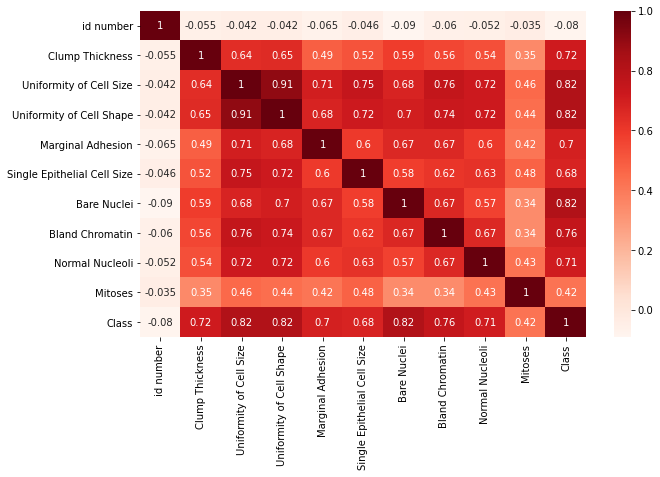

In [48]:
# Checking the Correlation between the features.
plt.figure(figsize=(10,6))
corr = wbcd.corr()
sns.heatmap(corr,annot=True,cmap = plt.cm.Reds)
plt.show()

In [49]:
# Checking the correlation between the features and the target variable.
cor_target = abs(corr["Class"])
relevant_featrues = cor_target[cor_target>0.5]
relevant_featrues

Clump Thickness                0.716001
Uniformity of Cell Size        0.817904
Uniformity of Cell Shape       0.818934
Marginal Adhesion              0.696800
Single Epithelial Cell Size    0.682785
Bare Nuclei                    0.817653
Bland Chromatin                0.756616
Normal Nucleoli                0.712244
Class                          1.000000
Name: Class, dtype: float64

In [50]:
# After correlation we can see that ID Number and Mitoses features don't factor to the target class so we are removing it.
wbcd.drop(['id number','Mitoses'],axis=1,inplace=True)
wbcd.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Class
0,5,1,1,1,2,1,3,1,2
1,5,4,4,5,7,10,3,2,2
2,3,1,1,1,2,2,3,1,2
3,6,8,8,1,3,4,3,7,2
4,4,1,1,3,2,1,3,1,2


In [22]:
wbcd.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

In [51]:
# Classification column in our case is the label , so we do not consider it in the training dataset, so we drop it.
X2 = wbcd.iloc[:,0:8]
# Class column is the label which is used as a target variable.
Y2 = wbcd.iloc[:,8]
# Assigning of the variables of the train test split which is performed on the training data set.
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2,test_size=0.20,random_state=0)
# Scaling of the data by using the Standard Scaler.
standard_scaler = StandardScaler()
# Performing Scaling on the training set.
X2_train = standard_scaler.fit_transform(X2_train)
# Performing Scaling on the test set.
X2_test = standard_scaler.transform(X2_test)

### Support Vector Machine (SVM)
#### a. Without Cross Validation.

In [65]:
# Defining the classifier 
svmw = SVC(kernel='linear',random_state=0)
# Training the Model
svmw.fit(X2_train,Y2_train)
# Predicting the model
svmw_predict = svmw.predict(X2_test)
# Creating the confusion matrix for our predictions
confusionmatrix1 = confusion_matrix(Y2_test,svmw_predict)
# Printing the Results.
print('The confusion matrix of the SVM model without cross validation:')
print(confusionmatrix1)
print('\nThe classification report of the SVM model without cross validation:')
print(classification_report(Y2_test,svmw_predict))
print('\nThe accuracy of the SVM model without cross validation:')
print(accuracy_score(Y2_test,svmw_predict)*100)

The confusion matrix of the SVM model without cross validation:
[[82  3]
 [ 1 54]]

The classification report of the SVM model without cross validation:
              precision    recall  f1-score   support

           2       0.99      0.96      0.98        85
           4       0.95      0.98      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140


The accuracy of the SVM model without cross validation:
97.14285714285714


#### b. With Cross Validation.

In [66]:
# Defining the classifier 
svmw_cv = SVC(kernel='linear',random_state=0)
# Predicting the Model with cross validation.
svmcv_pred = cross_val_score(svmw,X2_train,Y2_train,cv=5)
# Printing the Results.
print('The Accuracy Score after 5-Cross Validation are as follows')
print(svmcv_pred)
print('\nThe best accuracy of the SVM model with cross validation:')
print(max(svmcv_pred)*100)

The Accuracy Score after 5-Cross Validation are as follows
[0.92857143 0.97321429 0.95535714 0.98214286 0.97297297]

The best accuracy of the SVM model with cross validation:
98.21428571428571


### Decision Tree Algorithm (ID3)
#### a. Without Cross Validation.

In [67]:
# Defining the classifier 
id3w = DecisionTreeClassifier(criterion='entropy',random_state=0)
# Training the Model
id3w.fit(X2_train,Y2_train)
# Predicting the model
dtw_pred = id3w.predict(X2_test)
# Creating the confusion matrix for our predictions
confusionmatrix2 = confusion_matrix(Y2_test,dtw_pred)
# Printing the Results.
print('The confusion matrix of the ID3 model without cross validation:')
print(confusionmatrix2)
print('\nThe classification report of the ID3 model without cross validation:')
print(classification_report(Y2_test,dtw_pred))
print('\nThe accuracy of the ID3 model without cross validation:')
print(accuracy_score(Y2_test,dtw_pred)*100)

The confusion matrix of the ID3 model without cross validation:
[[79  6]
 [ 4 51]]

The classification report of the ID3 model without cross validation:
              precision    recall  f1-score   support

           2       0.95      0.93      0.94        85
           4       0.89      0.93      0.91        55

    accuracy                           0.93       140
   macro avg       0.92      0.93      0.93       140
weighted avg       0.93      0.93      0.93       140


The accuracy of the ID3 model without cross validation:
92.85714285714286


#### b. With Cross Validation.

In [68]:
# Defining the classifier 
id3w_cv = DecisionTreeClassifier(criterion='entropy',random_state=0)
# Predicting the Model with cross validation.
dtw_cv_pred = cross_val_score(id3w,X2_train,Y2_train,cv=5)
# Printing the Results.
print('The Accuracy Score after 5-Cross Validation are as follows')
print(dtw_cv_pred)
print('\nThe best accuracy of the ID3 model with cross validation:')
print(max(dtw_cv_pred)*100)

The Accuracy Score after 5-Cross Validation are as follows
[0.91071429 0.95535714 0.91964286 0.95535714 0.94594595]

The best accuracy of the ID3 model with cross validation:
95.53571428571429


## Comparing the Algorithms on the Wisconsin Breast Cancer Data Set.

### Accuracy of the Model.

<BarContainer object of 1 artists>

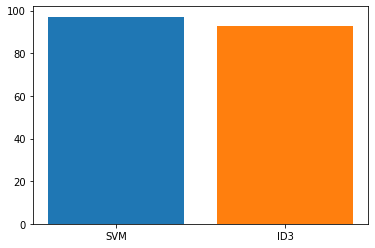

In [69]:
svmw_score = (accuracy_score(Y2_test,svmw_predict)*100)
dtw_score = (accuracy_score(Y2_test,dtw_pred)*100)
plt.bar(['SVM'],svmw_score)
plt.bar(['ID3'],dtw_score)

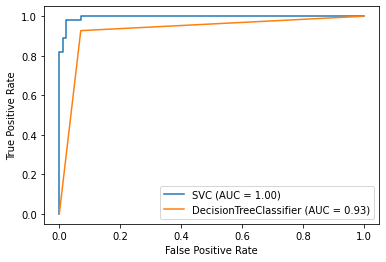

In [70]:
models = [svmw, id3w]
ax = plt.gca()
for i in models:
    plot_roc_curve(i, X2_test, Y2_test, ax=ax)

### From the grpahs plotted above , we can come to a conclusion that the Support Vector Machine Algorithm has a better performance over the Decision Tree Algorithm based on the following parameters.
### 1. Accuracy Measure : SVM has 97.14285714285714 %
### 2. AUC Metric : SVM has 1.0
### 3. F-1 Score : SVM has 0.98 

## Conclusion.
### The reason why the support vector machine performs well with the WBCD Dataset is because there are 699 samples across 11 features,it is a larger dataset when compared to the BCCD dataset which has only 116 samples across 10 features which is comparitively smaller. So the algorithms work well on the WBCD dataset and not on the BCCD dataset. There are also a lot of chances for underfitting to take place in the train test split of the BCCD dataset because it has really less data.The main reason that the Decision Tree Algorithm had a lesser accuracy for the BCCD dataset is because, the classification features were less and the number of tree nodes created would also be proportionally lesser.

## References

### https://scikit-learn.org/stable/modules/svm.html
### https://scikit-learn.org/stable/modules/tree.html
### https://matplotlib.org/stable/contents.html
### https://datascience.stackexchange.com/questions/54436/valueerror-pos-label-1-is-not-a-valid-label-arrayn-y-dtype-u1
### https://stackoverflow.com/questions/56202930/this-svc-instance-is-not-fitted-yet-call-fit-with-appropriate-arguments-befor